In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CropYield.csv')

In [3]:
provinces = ['Ha_Noi', 'Hai_Duong', 'Hung_Yen', 'Nam_Dinh', 'Ninh_Binh', 'Thai_Binh', 'Ha_Nam', 'Thanh_Hoa', 'Nghe_An', 'Ha_Tinh', 'Quang_Binh', 'Quang_Tri', 'Hue', 'Long_An', 'Tien_Giang', 'Ben_Tre', 'Tra_Vinh', 'Dong_Thap', 'An_Giang', 'Kien_Giang', 'Can_Tho', 'Soc_Trang', 'Bac_Lieu', 'Ca_Mau']
colors = ['rosybrown', 'lightcoral', 'maroon', 'red', 'tomato', 'darksalmon', 'sienna', 'chocolate', 'orange', 'darkgoldenrod', 'darkolivegreen', 'darkseagreen', 'turquoise', 'darkcyan', 'deepskyblue', 'slategray', 'cornflowerblue', 'navy', 'slateblue', 'blueviolet', 'mediumorchid', 'darkmagenta', 'mediumvioletred', 'crimson', 'lightpink']

In [4]:
def fetch_yield(table, province):
    y = np.array(df.loc[df['Province'] == province]['CropYield'])
    
    y_predicted = []
    
    for i in range(5, 26):
        row = [1995 + i, province]
        
        avg = (y[i - 1] + y[i - 2] + y[i - 3] + y[i - 4] + y[i - 5])/5
        row.append(y[i] - avg)
        
        table.loc[len(table)] = row
        y_predicted.append(avg)
        
    
    return y_predicted, y


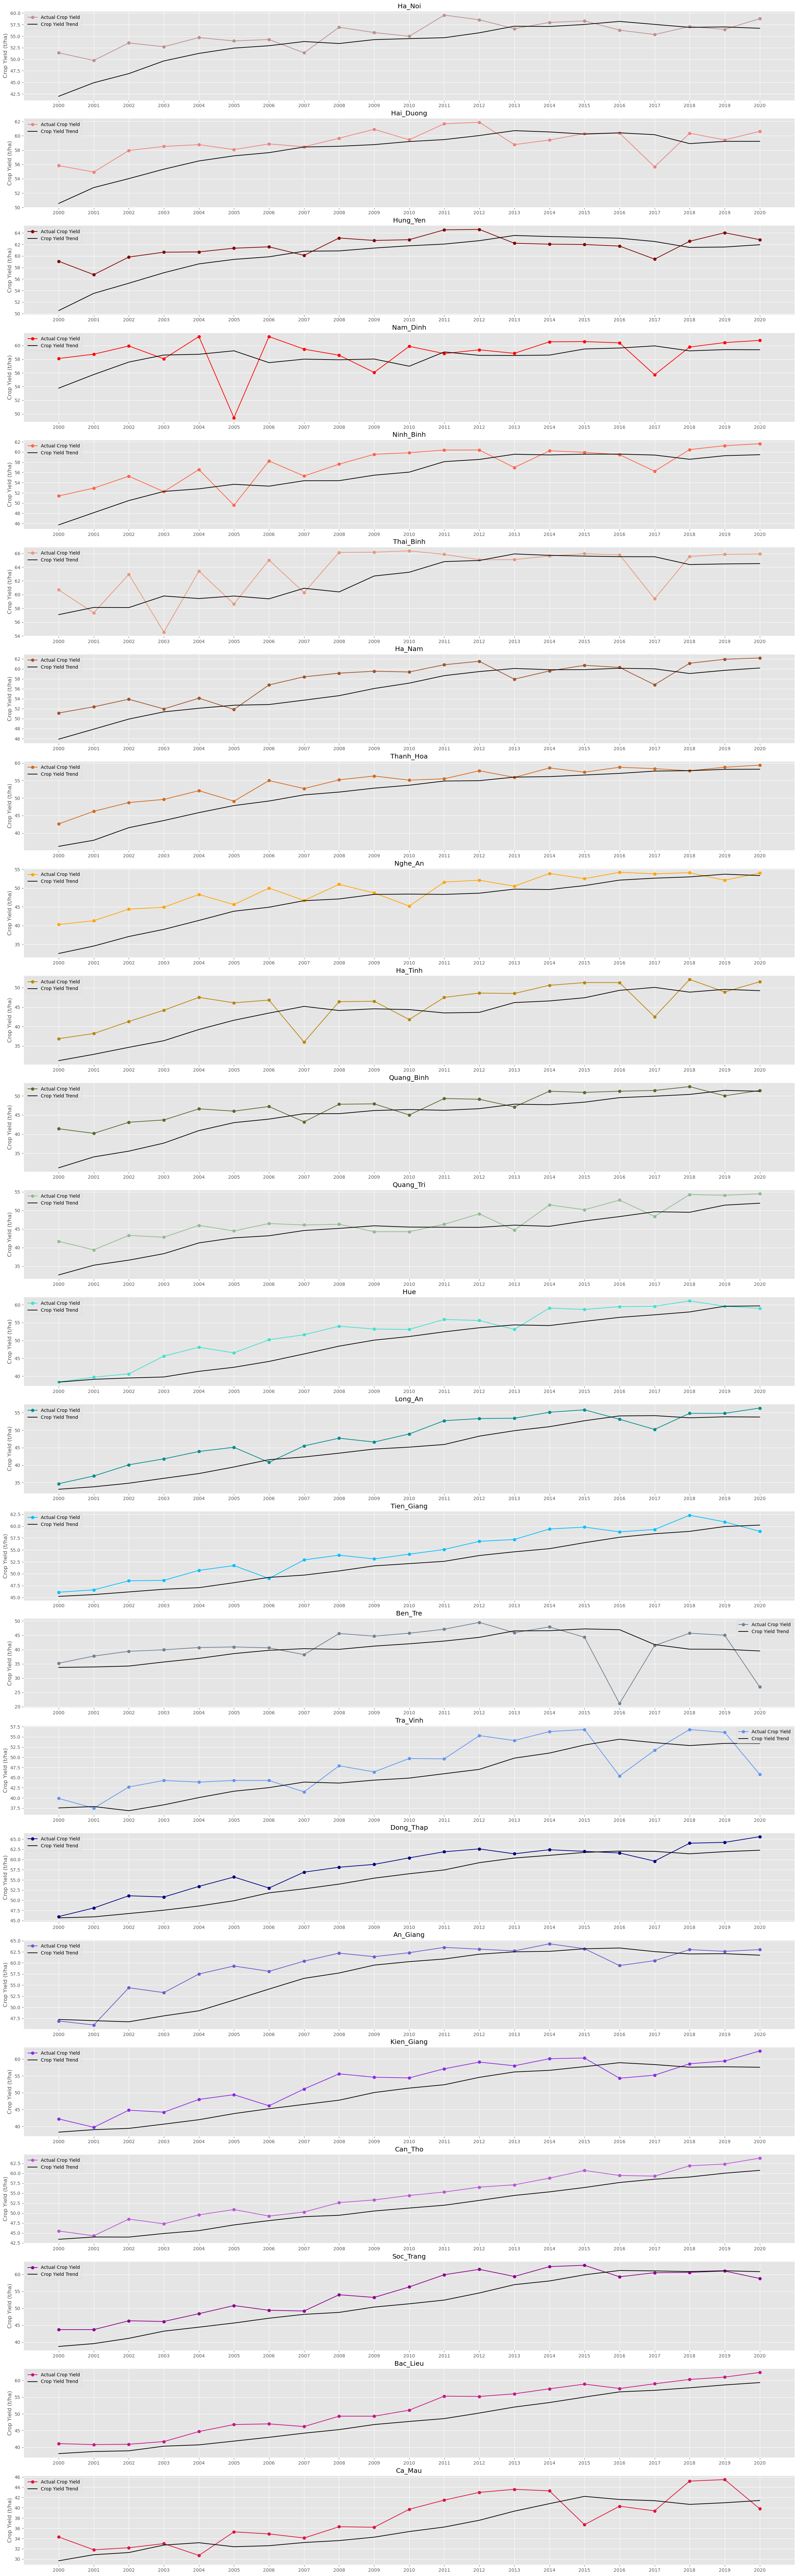

In [5]:
nrows = 24
ncols = 1

plt.style.use('ggplot') 

fig = plt.figure(figsize=(30, 100))

table = pd.DataFrame(columns=['Year', 'Province', 'RandomCropYield'])

for id, province in enumerate(provinces):
    crop_yield_trend, actual_crop_yield = fetch_yield(table=table, province=province)
    
    ax = fig.add_subplot(nrows, ncols, id + 1)
    
    ax.plot(np.arange(2000, 2021), actual_crop_yield[5:], marker='o', c=colors[id], label='Actual Crop Yield')
    ax.plot(np.arange(2000, 2021), crop_yield_trend, c='black', label='Crop Yield Trend')

    ax.legend()
    ax.set_xticks(np.arange(2000, 2021, dtype=int), list(map(str, list(np.arange(2000, 2021)))))
    ax.set_title(province)
    
    ax.set_ylabel('Crop Yield (t/ha)')


plt.show()
    

In [7]:
table.to_csv('RandomCropYield(MovingAverages).csv', index=False)